# 성능 평가 지표

## 정확도(Accuracy)
* 정확도는 전체 예측 데이터 건수 중 예측 결과가 동일한 데이터 건수로 계산
* scikit-learn에서는 `accuracy_score` 함수를 제공

In [12]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# make_classification으로 data 생성 가능 
X, y= make_classification(
    n_samples=1000, n_features=2, n_informative=2,  # feature 2개 -> binary data형태
    n_redundant=0, n_clusters_per_class=1           # redundant=0 -> 노이즈 없게, clusters_per_class : class 당 cluster를 몇 개로 둘지
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

print("훈련 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))


훈련 데이터 점수 : 0.9614285714285714
평가 데이터 점수 : 0.9733333333333334


In [13]:
from sklearn.metrics import accuracy_score

predict = model.predict(X_test) # test data에 대해서 얼만큼 예측을 했는지
print("정확도 : {}" .format(accuracy_score(y_test, predict)))

'''
위의 예제는 데이터 분포가 균일했기 때문에 accuracy_score가 높게 나온 것인데,

데이터 분포가 균일하지 않을 때도 accuracy_score가 높게 나올 수 있다.
따라서 accuracy_score에 따라 성능 평가를 판단하면 안된다는 점에 유의해야 한다.
'''

정확도 : 0.9733333333333334


'\n위의 예제는 데이터 분포가 균일했기 때문에 accuracy_score가 높게 나온 것인데,\n\n데이터 분포가 균일하지 않을 때도 accuracy_score가 높게 나올 수 있다.\n따라서 accuracy_score에 따라 성능 평가를 판단하면 안된다는 점에 유의해야 한다.\n'

## 오차 행렬(Confusion Matrix)
* True Negative (TN) : 예측값을 Negative 값 0으로 예측했고, 실제 값도 Negative 값 0
* False Positive (FP): 예측값을 Positive 값 1을 예측했는데, 실제 값은 Negative 값 0
* False Negative (FN): 예측값을 Negative 값 0으로 예측했는데, 실제 값도 Positive 값 1
* True Positive (TP): 예측값을 Positive 값 1으로 예측했고, 실제 값도 Positive 값 1

In [14]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=predict)
print(confmat)

[[144   2]
 [  6 148]]


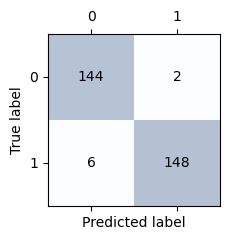

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)

for i in range(confmat.shape[0]) :
    for j in range(confmat.shape[1]) :
        ax.text(x=j, y=i, s=confmat[i, j], ha='center', va='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

'''
Predicted label   |   True label   | 
        0                  0            TN (True Negative  : 예측값을 Negative 값 0으로 예측했고, 실제 값도 Negative 값 0)
        0                  1            FP (False Positive : 예측값을 Positive 값 1으로 예측했는데, 실제 값은 Negative 값 0) 
        1                  0            FN (False Negative : 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1)
        1                  1            TP (True Positive  : 예측값을 Positive 값 1으로 예측했고, 실제 값도 Positive 값 1)
'''